In [ ]:
# https://towardsdatascience.com/drowsiness-detection-using-convolutional-neural-networks-face-recognition-and-tensorflow-56cdfc8315ad
%pip install sklearn
%pip install -U -q segmentation-models
%pip install tensorflow==2.1.0
%pip install -q keras==2.3.1
%pip install -q tensorflow-estimator==2.1.

## Imports libs
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

import segmentation_models as sm
import cv2
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#from keras.models import Sequential
#from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
import keras

from tensorflow.keras.callbacks import ModelCheckpoint,CSVLogger
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers


def loadImages(folder, eyes = 0):
    count = 0
    error_count = 0
    images = []
    for filename in os.listdir(folder):
        try:
            image = cv2.imread(os.path.join(folder, filename))
            image = cv2.resize(image, (224,224)) 

            images.append([image, eyes])
        except:
            error_count += 1
            print('Error count = ' + str(error_count))
            continue
        
        count += 1
        if count % 500 == 0:
            print('Import Image Successful Count = ' + str(count))

    return images

folder="data/train/open"
open_eyes = loadImages(folder, 0)

folder="data/train/close" 
closed_eyes = loadImages(folder, 1)   
eyes = closed_eyes + open_eyes

X = [] 
y = [] 
for features, label in eyes: 
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, 224, 224, 3)

y = np.array(y)

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)


def createModel():
    input = Input(shape=(224,224,3), name='Input')
    x = Conv2D(32,(3,3),padding='same')(input)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = Dropout(0.25)(x)
    x = Conv2D(32,(3,3),padding='same')(x)
    x = Activation('relu')(x)
    #x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(32,(3,3),padding='same')(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = Dropout(0.25)(x)
    #x = Conv2D(32,(3,3),padding='same')(x)
    #x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(32,(3,3),padding='same')(x)
    #x = BatchNormalization()(x)
    x = Activation('relu')(x)
    #x = Dropout(0.25)(x)
    x = Conv2D(32,(3,3),padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Flatten()(x)
    x = Dense(256,activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(128,activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(64,activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(1,activation='sigmoid')(x)
    
    model = Model(inputs=input,outputs=x)
    
   # optimizerz = keras.optimizers.Adam(lr=0.001) # from class

    model.compile(loss='binary_crossentropy', 
                  optimizer='adam', 
                  metrics=['acc'])
    return model

                                                                              
model = createModel() 

# fitting the model
history = model.fit(X_train,
            y_train,
            batch_size=800,
            validation_data=(X_test, y_test),
            epochs=40)

#history=model.fit(X_train, y_train, validation_split=0.25, epochs=80, batch_size=50) # this is mini batch


# evaluate the model 
model.evaluate(X_test, y_test, verbose=1)

model.save('cnn_model_original_full.h5')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Import Image Successful Count = 500
Import Image Successful Count = 1000
Import Image Successful Count = 500
Import Image Successful Count = 1000
Train on 1817 samples, validate on 606 samples
Epoch 1/40
1817/1817 [==============================] - 164s 90ms/sample - loss: 0.7374 - acc: 0.5058 - val_loss: 0.6932 - val_acc: 0.5083
Epoch 2/40
1817/1817 [==============================] - 111s 61ms/sample - loss: 0.6957 - acc: 0.5080 - val_loss: 0.6874 - val_acc: 0.4901
Epoch 3/40
1817/1817 [==============================] - 130s 71ms/sample - loss: 0.6875 - acc: 0.5118 - val_loss: 0.6814 - val_acc: 0.6386
Epoch 4/40
1817/1817 [==============================] - 119s

Epoch 5/40
1817/1817 [==============================] - 117s 64ms/sample - loss: 0.6685 - acc: 0.5933 - val_loss: 0.6446 - val_acc: 0.5957
Epoch 6/40
1817/1817 [==============================] - 114s 63ms/sample - loss: 0.6443 - acc: 0.6445 - val_loss: 0.6251 - val_acc: 0.6337
Epoch 7/40
1817/1817 [==============================] - 112s 62ms/sample - loss: 0.6042 - acc: 0.6912 - val_loss: 0.5768 - val_acc: 0.6931
Epoch 8/40
1817/1817 [==============================] - 107s 59ms/sample - loss: 0.5622 - acc: 0.7122 - val_loss: 0.5165 - val_acc: 0.7327
Epoch 9/40
1817/1817 [==============================] - 112s 62ms/sample - loss: 0.5442 - acc: 0.7259 - val_loss: 0.5377 - val_acc: 0.7343
Epoch 10/40
1817/1817 [==============================] - 113s 62ms/sample - loss: 0.5185 - acc: 0.7424 - val_loss: 0.5104 - val_acc: 0.7393
Epoch 11/40
1817/1817 [==============================] - 114s 63ms/sample - loss: 0.4823 - acc: 0.7661 - val_loss: 0.4829 - val_acc: 0.7624
Epoch 12/40
1817/1817 [==

In [2]:
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix 


predictions = model.predict(X_test)  

In [3]:
#print(predictions)

In [4]:
predictions = np.where(predictions > 0.5, 1, 0)
#print(predictions)


In [5]:
# Confusion Matrix
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.8085808580858086
[[216  92]
 [ 24 274]]
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       308
           1       0.75      0.92      0.83       298

    accuracy                           0.81       606
   macro avg       0.82      0.81      0.81       606
weighted avg       0.83      0.81      0.81       606



In [6]:
# evaluate the model 
model.evaluate(X_test, y_test, verbose=1)

606/606 [==============================] - 4s 7ms/sample - loss: 0.3927 - acc: 0.8086


[0.3926572302977244, 0.8085809]

In [7]:
# Model Summary
print(model.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 224, 224, 32)      0     


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


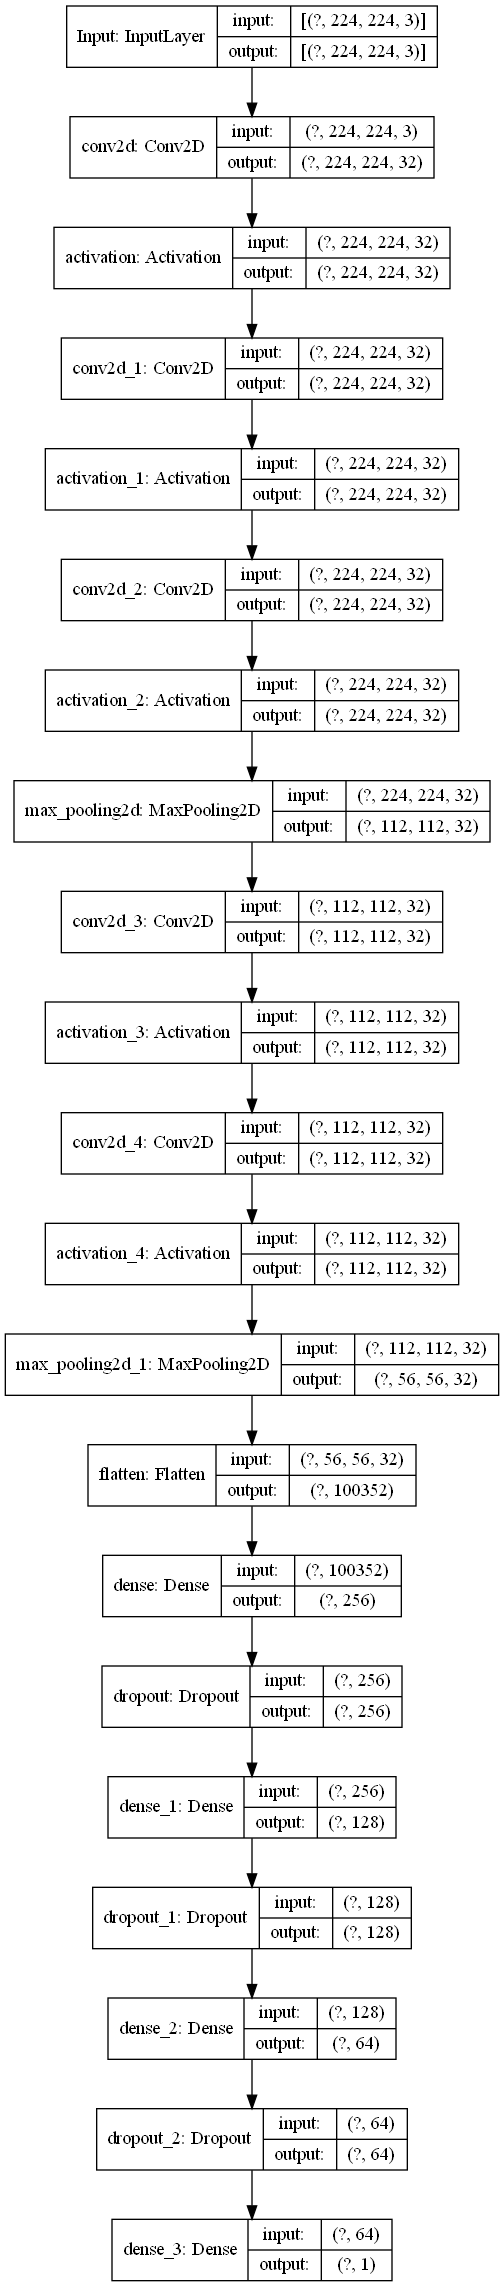

In [8]:
#conda install pydot pydotplus
#from keras.utils import plot_model
%pip install pydot 
%pip install pydotplus
%pip install graphviz
from tensorflow.keras.utils import plot_model

#from keras.utils.vis_utils import plot_model
import IPython
import keras

plot_model(model, to_file='model.png',show_shapes=True)
IPython.display.Image("model.png")

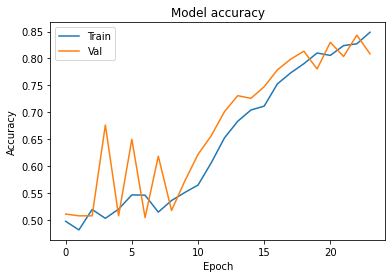

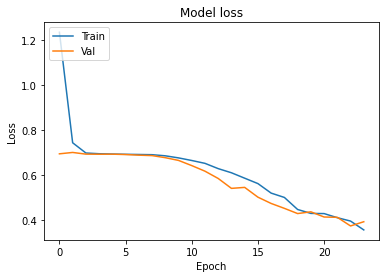

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [10]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[]
[array([[[[ 7.60708004e-02,  5.56867346e-02, -5.61562739e-02,
          -2.42939703e-02, -4.80529219e-02,  1.42016947e-01,
           1.23386227e-01, -9.89603723e-05, -2.03011855e-02,
           7.71538243e-02,  1.35584041e-01,  8.32872391e-02,
          -1.17459960e-01, -1.20641291e-01, -1.07054166e-01,
          -1.03748851e-01,  1.14243738e-01, -7.57635757e-02,
           9.53990296e-02,  4.06140788e-03,  7.86457881e-02,
          -1.06733263e-01, -6.94072917e-02,  3.36590707e-02,
          -1.03657164e-01, -9.73875746e-02, -6.67170957e-02,
          -1.83102172e-02, -6.80336282e-02, -4.04858328e-02,
           8.05044696e-02,  1.00751072e-01],
         [ 2.94460244e-02, -1.04564447e-02, -8.22179988e-02,
          -1.45911261e-01,  2.55244765e-02, -1.14601195e-01,
           5.91854826e-02, -2.19715722e-02,  1.28508061e-01,
          -1.26235932e-01,  1.54733853e-02,  4.29652296e-02,
           1.04517668e-01, -3.86450551e-02,  9.78781562e-03,
          -1.35493100e-01,  1.027916